Slight improvement with val loss 0.6, testing different activation functions on layers.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from itertools import chain
from keras.preprocessing.sequence import TimeseriesGenerator
from matplotlib import pyplot as plt
from tensorflow.keras import layers
df = pd.read_csv("drive/MyDrive/Engineer's Project/test.csv")

In [ ]:
df.pop('usa_cpi')
df.pop('pol_cpi')
df.pop('usa_inter')
df.pop('pol_inter')

0       5.82
1       5.82
2       5.82
3       5.82
4       5.82
        ... 
3537    4.83
3538    4.83
3539    4.83
3540    4.83
3541    4.83
Name: pol_inter, Length: 3542, dtype: float64

In [ ]:
df.pop('Date')
float_data = np.array(df).astype('float32')
mean = float_data[:2501].mean(axis=0)
std = float_data[:2501].std(axis=0)
float_data -= mean
float_data /= std

In [ ]:
lookback = 30
step = 1
delay = 1
batch_size = 128

In [ ]:
def generator(data, lookback, delay, min_index, max_index,shuffle=False, batch_size=128, step=1):
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while 1:
    if shuffle:
      rows = np.random.randint(
        min_index + lookback, max_index, size=batch_size)
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i, min(i + batch_size, max_index))
      i += len(rows)
    samples = np.zeros((len(rows),lookback // step,data.shape[-1]))
    targets = np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][3]
    yield samples, targets

In [ ]:
train_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=0,
max_index=2501,
shuffle=True,
step=step,
batch_size=batch_size)

In [ ]:
val_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=2501,
max_index=3001,
step=step,
batch_size=batch_size)

In [ ]:
test_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=3001,
max_index=3541,
step=step,
batch_size=batch_size)

In [ ]:
val_steps = (3001 - 2501 - lookback)
test_steps = (len(float_data) - 3001 - lookback)

Best model, softmax, val loss 0.65!

In [ ]:
model = tf.keras.models.Sequential()
model.add(layers.LSTM(128,
  activation='softmax',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(5,
  activation='softmax',))
model.add(layers.Dense(1))
model.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history = model.fit(train_gen,
  steps_per_epoch=400,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
400/400 [==============================] - 67s 162ms/step - loss: 0.7506 - val_loss: 0.4446
Epoch 2/200
400/400 [==============================] - 54s 134ms/step - loss: 0.2712 - val_loss: 0.2231
Epoch 3/200
400/400 [==============================] - 55s 138ms/step - loss: 0.1632 - val_loss: 0.0982
Epoch 4/200
400/400 [==============================] - 54s 134ms/step - loss: 0.1033 - val_loss: 0.0883
Epoch 5/200
400/400 [==============================] - 54s 134ms/step - loss: 0.0860 - val_loss: 0.0829
Epoch 6/200
400/400 [==============================] - 54s 134ms/step - loss: 0.0801 - val_loss: 0.0825
Epoch 7/200
400/400 [==============================] - 54s 134ms/step - loss: 0.0776 - val_loss: 0.0669
Epoch 8/200
400/400 [==============================] - 54s 135ms/step - loss: 0.0759 - val_loss: 0.0687
Epoch 9/200
400/400 [==============================] - 53s 133ms/step - loss: 0.0746 - val_loss: 0.0648
Epoch 10/200
400/400 [==============================] - 53s 134m

In [ ]:
eval = model.evaluate(test_gen, steps = test_steps)
eval *std[3]

511/511 [==============================] - 13s 26ms/step - loss: 0.0651


0.024322449586538397

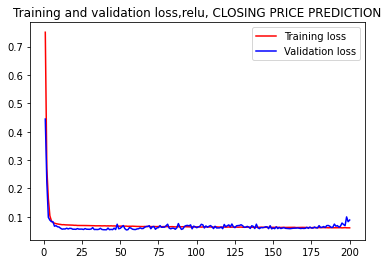

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Best model, sigmoid, val loss 0.8

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(layers.LSTM(128,
  activation='sigmoid',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model1.add(layers.Dense(5,
  activation='sigmoid',))
model1.add(layers.Dense(1))
model1.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history1 = model1.fit(train_gen,
  steps_per_epoch=400,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
400/400 [==============================] - 56s 133ms/step - loss: 0.2224 - val_loss: 0.1112
Epoch 2/200
400/400 [==============================] - 51s 129ms/step - loss: 0.0959 - val_loss: 0.0826
Epoch 3/200
400/400 [==============================] - 51s 127ms/step - loss: 0.0843 - val_loss: 0.0693
Epoch 4/200
400/400 [==============================] - 52s 130ms/step - loss: 0.0785 - val_loss: 0.0619
Epoch 5/200
400/400 [==============================] - 51s 127ms/step - loss: 0.0747 - val_loss: 0.0569
Epoch 6/200
400/400 [==============================] - 51s 127ms/step - loss: 0.0731 - val_loss: 0.0576
Epoch 7/200
400/400 [==============================] - 51s 128ms/step - loss: 0.0712 - val_loss: 0.0628
Epoch 8/200
400/400 [==============================] - 51s 128ms/step - loss: 0.0705 - val_loss: 0.0543
Epoch 9/200
400/400 [==============================] - 51s 127ms/step - loss: 0.0686 - val_loss: 0.0561
Epoch 10/200
400/400 [==============================] - 51s 128m

In [ ]:
eval1 = model1.evaluate(test_gen, steps = test_steps)
eval1 *std[3]

511/511 [==============================] - 22s 42ms/step - loss: 0.0837


0.031250455929140664

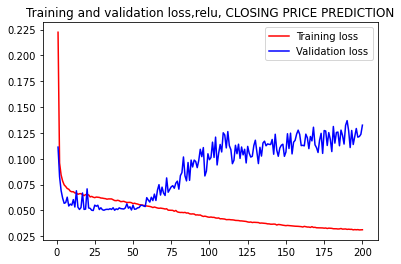

In [ ]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
epochs1 = range(1, len(loss1) + 1)
plt.figure()
plt.plot(epochs1, loss1, 'r', label='Training loss')
plt.plot(epochs1, val_loss1, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Best model with relu

In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(layers.LSTM(128,
  activation='relu',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model2.add(layers.Dense(5,
  activation='relu',))
model2.add(layers.Dense(1))
model2.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history2 = model2.fit(train_gen,
  steps_per_epoch=400,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
400/400 [==============================] - 54s 129ms/step - loss: 0.0940 - val_loss: 0.0560
Epoch 2/200
400/400 [==============================] - 54s 135ms/step - loss: 0.0673 - val_loss: 0.1218
Epoch 3/200
400/400 [==============================] - 52s 129ms/step - loss: 0.0633 - val_loss: 0.0757
Epoch 4/200
400/400 [==============================] - 51s 129ms/step - loss: 0.0604 - val_loss: 0.0864
Epoch 5/200
400/400 [==============================] - 55s 139ms/step - loss: 0.0586 - val_loss: 0.0796
Epoch 6/200
400/400 [==============================] - 52s 129ms/step - loss: 0.0560 - val_loss: 0.1603
Epoch 7/200
400/400 [==============================] - 51s 128ms/step - loss: 0.0550 - val_loss: 0.1197
Epoch 8/200
400/400 [==============================] - 52s 129ms/step - loss: 0.0535 - val_loss: 0.0953
Epoch 9/200
400/400 [==============================] - 51s 129ms/step - loss: 0.0519 - val_loss: 0.1269
Epoch 10/200
400/400 [==============================] - 51s 128m

In [ ]:
eval2 = model2.evaluate(test_gen, steps = test_steps)
eval2 *std[3]

511/511 [==============================] - 16s 31ms/step - loss: 0.1061


0.039631843816999135

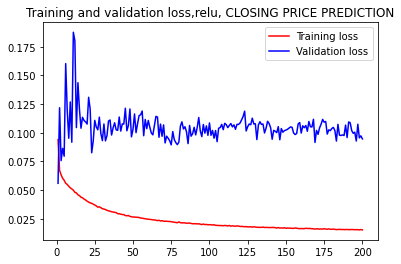

In [ ]:
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs2 = range(1, len(loss2) + 1)
plt.figure()
plt.plot(epochs2, loss2, 'r', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Best model, softplus, terrible loss after 140 epochs

In [ ]:
model3 = tf.keras.models.Sequential()
model3.add(layers.LSTM(128,
  activation='softplus',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model3.add(layers.Dense(5,
  activation='softplus',))
model3.add(layers.Dense(1))
model3.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history3 = model3.fit(train_gen,
  steps_per_epoch=400,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
400/400 [==============================] - 70s 170ms/step - loss: 0.1231 - val_loss: 0.0603
Epoch 2/200
400/400 [==============================] - 63s 159ms/step - loss: 0.0765 - val_loss: 0.0634
Epoch 3/200
400/400 [==============================] - 65s 162ms/step - loss: 0.0731 - val_loss: 0.0540
Epoch 4/200
400/400 [==============================] - 64s 159ms/step - loss: 0.0717 - val_loss: 0.0574
Epoch 5/200
400/400 [==============================] - 64s 161ms/step - loss: 0.0707 - val_loss: 0.0594
Epoch 6/200
400/400 [==============================] - 65s 161ms/step - loss: 0.0703 - val_loss: 0.0566
Epoch 7/200
400/400 [==============================] - 64s 160ms/step - loss: 0.0694 - val_loss: 0.0508
Epoch 8/200
400/400 [==============================] - 64s 159ms/step - loss: 0.0695 - val_loss: 0.0511
Epoch 9/200
400/400 [==============================] - 64s 160ms/step - loss: 0.0684 - val_loss: 0.0716
Epoch 10/200
400/400 [==============================] - 64s 160m

In [ ]:
eval3 = model3.evaluate(test_gen, steps = test_steps)
eval3 *std[3]

511/511 [==============================] - 19s 37ms/step - loss: 1.0637


0.39716795193614374

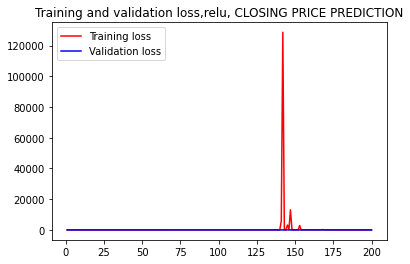

In [ ]:
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
epochs3 = range(1, len(loss3) + 1)
plt.figure()
plt.plot(epochs3, loss3, 'r', label='Training loss')
plt.plot(epochs3, val_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Best model, tanh

In [ ]:
model4 = tf.keras.models.Sequential()
model4.add(layers.LSTM(128,
  activation='tanh',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model4.add(layers.Dense(5,
  activation='tanh',))
model4.add(layers.Dense(1))
model4.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history4 = model4.fit(train_gen,
  steps_per_epoch=400,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
400/400 [==============================] - 59s 143ms/step - loss: 0.0921 - val_loss: 0.0544
Epoch 2/200
400/400 [==============================] - 57s 143ms/step - loss: 0.0709 - val_loss: 0.0503
Epoch 3/200
400/400 [==============================] - 57s 142ms/step - loss: 0.0673 - val_loss: 0.0554
Epoch 4/200
400/400 [==============================] - 57s 142ms/step - loss: 0.0645 - val_loss: 0.0700
Epoch 5/200
400/400 [==============================] - 57s 142ms/step - loss: 0.0623 - val_loss: 0.1020
Epoch 6/200
400/400 [==============================] - 57s 142ms/step - loss: 0.0606 - val_loss: 0.0634
Epoch 7/200
400/400 [==============================] - 57s 142ms/step - loss: 0.0580 - val_loss: 0.0899
Epoch 8/200
400/400 [==============================] - 57s 144ms/step - loss: 0.0556 - val_loss: 0.0976
Epoch 9/200
400/400 [==============================] - 58s 144ms/step - loss: 0.0529 - val_loss: 0.1287
Epoch 10/200
400/400 [==============================] - 57s 143m

In [ ]:
eval4 = model4.evaluate(test_gen, steps = test_steps)
eval4 *std[3]

511/511 [==============================] - 12s 23ms/step - loss: 0.1278


0.04772710605441288

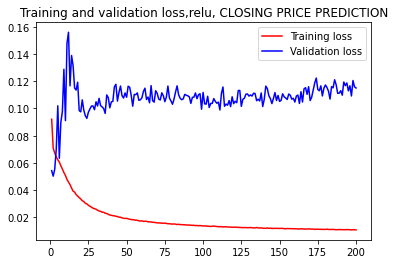

In [ ]:
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']
epochs4 = range(1, len(loss4) + 1)
plt.figure()
plt.plot(epochs4, loss4, 'r', label='Training loss')
plt.plot(epochs4, val_loss4, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Best model with selu

In [ ]:
model5 = tf.keras.models.Sequential()
model5.add(layers.LSTM(128,
  activation='selu',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model5.add(layers.Dense(5,
  activation='selu',))
model5.add(layers.Dense(1))
model5.compile(optimizer= tf.keras.optimizers.Adam(), loss='mae')
history5 = model5.fit(train_gen,
  steps_per_epoch=400,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
400/400 [==============================] - 63s 153ms/step - loss: 0.0835 - val_loss: 0.0799
Epoch 2/200
400/400 [==============================] - 61s 153ms/step - loss: 0.0692 - val_loss: 0.0606
Epoch 3/200
400/400 [==============================] - 61s 153ms/step - loss: 0.0647 - val_loss: 0.0593
Epoch 4/200
400/400 [==============================] - 61s 153ms/step - loss: 0.0619 - val_loss: 0.0561
Epoch 5/200
400/400 [==============================] - 61s 153ms/step - loss: 0.0592 - val_loss: 0.0613
Epoch 6/200
400/400 [==============================] - 61s 153ms/step - loss: 0.0573 - val_loss: 0.0621
Epoch 7/200
400/400 [==============================] - 61s 153ms/step - loss: 0.0552 - val_loss: 0.0649
Epoch 8/200
400/400 [==============================] - 61s 154ms/step - loss: 0.0529 - val_loss: 0.0617
Epoch 9/200
400/400 [==============================] - 61s 153ms/step - loss: 0.0509 - val_loss: 0.0704
Epoch 10/200
400/400 [==============================] - 61s 153m

In [ ]:
eval5 = model5.evaluate(test_gen, steps = test_steps)
eval5 *std[3]

511/511 [==============================] - 14s 28ms/step - loss: 0.0979


0.03656656992031193

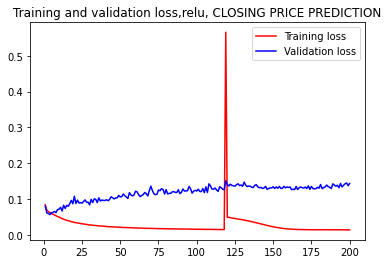

In [ ]:
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']
epochs5 = range(1, len(loss5) + 1)
plt.figure()
plt.plot(epochs5, loss5, 'r', label='Training loss')
plt.plot(epochs5, val_loss5, 'b', label='Validation loss')
plt.title('Training and validation loss,relu, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()